# Extracting Words From Audio File (.Wav) without any srt.

Here we are going to extract words and made separate chunks for every words from input audio file i.e. .wav file. If you have mp4 or mp3 files no worries I will provide command to convert them also. So, lets get started... 

I have audio after noise reduction and other preprocessing. You can find these. 

<h2>Importing Libraries</h2>

In [4]:
import librosa 
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa.display

<h2> Converting from mp3 or mp4 to .wav (audio file)</h2>

Use these commands to convert and for this you should have ffmpeg installed 

<b>1. command2mp3 = "ffmpeg -i (your_audio).mp4 (new_audio).mp3"</b> // if you have mp4 file follow both command. 


<b>2. command2wav = "ffmpeg -i (new_audio).mp3 (needed_audio).wav"</b>  // if you have mp3 file use only this command.

<h2>Loading Audio File</h2>

In [5]:
audio_path = 'akw.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


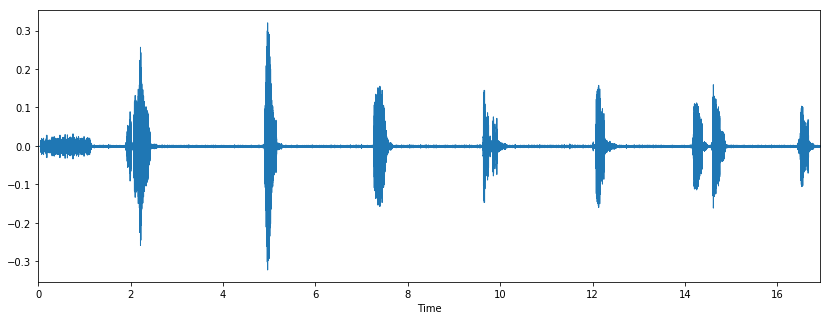

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

<h2>identifying vaious sounds</h2>

7


C:\Users\Akshay PC\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


(-1, 1)

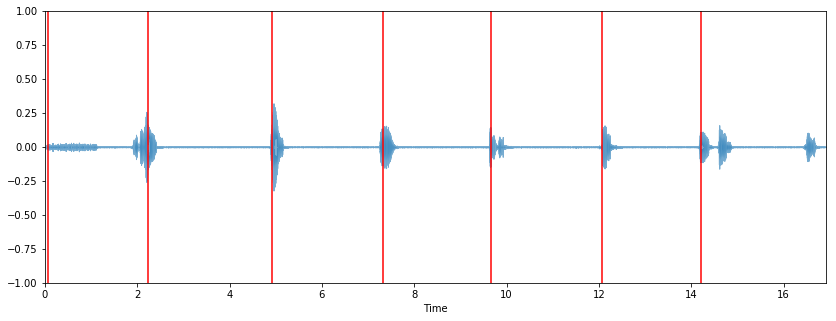

In [18]:
from pydub import AudioSegment

beats = []

tempo, beat_times = librosa.beat.beat_track(x, sr=sr, start_bpm=60, units='time',trim=True)

print(len(beat_times))
beats = beat_times

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)    

<h2>Making Chunks as identified above</h2> 

In [24]:
start_time = 0
end_time = 0
count = 0

for i in beat_times:
    if i != max(beat_times):
        start = beat_times[count]*1000
        end = beat_times[count+1]*1000
        newAudio = AudioSegment.from_wav("akw.wav")
        newAudio = newAudio[start:end]
        newAudio.export(('newSong{}.wav').format(count), format="wav")
        print('Chunk {} is build.'.format(count))
    else:
        newAudio = AudioSegment.from_wav("akww.wav")
        start = max(beat_times)*1000
        newAudio = newAudio[start:]
        newAudio.export('new.wav', format="wav")
        print('Chunk {} is build.'.format(count))
    count = count + 1
    

Chunk 0 is build.
Chunk 1 is build.
Chunk 2 is build.
Chunk 3 is build.
Chunk 4 is build.
Chunk 5 is build.
Chunk 6 is build.


<h2> Spectrogram Repersentation </h2>

1025
1025
22050


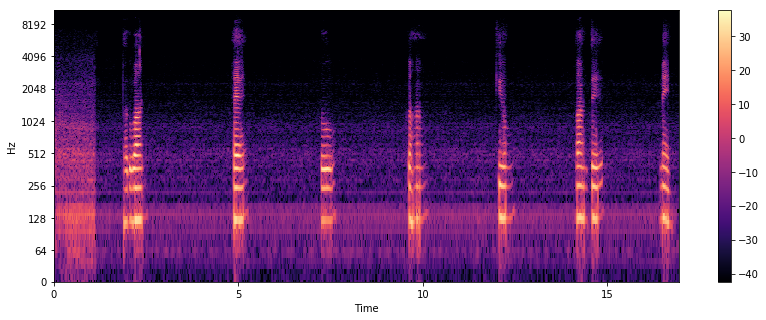

In [7]:
#display Spectrogram
X = librosa.stft(x) #short term fourier transform 
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb,sr=sr, x_axis='time', y_axis='hz') 


#If to print log of frequencies  
librosa.display.specshow(Xdb,sr=sr,  x_axis='time', y_axis='log')
plt.colorbar()

<h2> Features Extractions </h2>

In this we will see four main features which every audio wav file have.

1. Zero Crossing: Rate at which the signal changes from positive to negative or back.
2. Spectral Centroids: Indicates where centre of mass of sound is located.
3. Spectral RollOff: Frequency below which a specified percentage of total spectral energy.
4. MFCC: (MOST IMPORTANT) A small set of features (10-20) which concisely describe the overall shape of a spectral envelope.

<h3> Zero Crossing </h3>

In [10]:
n0 = 0
n1 = 800000 #I am taking for 800 seconds
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

15164


In [11]:
# we can also have zero crossing rate 

librosa.feature.zero_crossing_rate(x)

array([[0.20410156, 0.21777344, 0.22998047, 0.078125  , 0.05175781,
        0.05224609, 0.05273438, 0.05712891, 0.05371094, 0.05664062,
        0.05664062, 0.05273438, 0.0546875 , 0.04833984, 0.04541016,
        0.04296875, 0.04101562, 0.03808594, 0.03662109, 0.03808594,
        0.03222656, 0.03222656, 0.03369141, 0.03125   , 0.04052734,
        0.04199219, 0.04248047, 0.04589844, 0.03955078, 0.04199219,
        0.04248047, 0.04052734, 0.04492188, 0.04736328, 0.04736328,
        0.04345703, 0.04199219, 0.03710938, 0.03417969, 0.03759766,
        0.03613281, 0.03710938, 0.04003906, 0.03857422, 0.03808594,
        0.03759766, 0.03613281, 0.03613281, 0.04931641, 0.05224609,
        0.06347656, 0.06884766, 0.05957031, 0.05859375, 0.04882812,
        0.04345703, 0.03710938, 0.03662109, 0.03515625, 0.04101562,
        0.04443359, 0.04394531, 0.04541016, 0.03955078, 0.0390625 ,
        0.03955078, 0.03808594, 0.04150391, 0.04248047, 0.04150391,
        0.04589844, 0.04150391, 0.04003906, 0.03

<h2>spectral_centroids</h2>

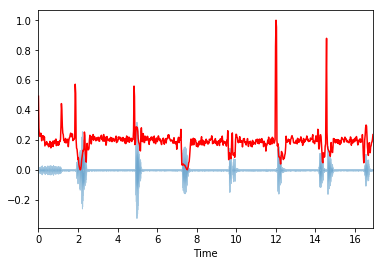

In [12]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

<h2>spectral_rolloff</h2>

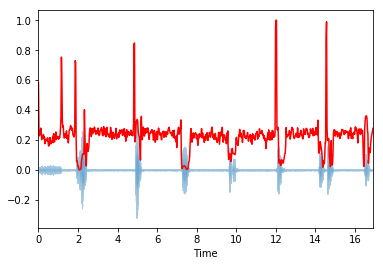

In [14]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

<h2>mfccs</h2>

(20, 729)


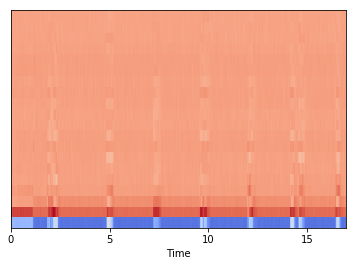

In [15]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')